In [159]:
from sklearn import *
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from matplotlib import style
style.use('ggplot')

In [160]:
sys.path.append('../utilities/')
from utils import *

In [161]:
dat = pd.read_csv('../CSVData/04.13.2019vsUVAGM2.csv')

In [162]:
dat.columns

Index(['#', 'Name', 'ClipType', 'Media In', 'Media Out', 'Media Offset',
       'Game Date', 'At Bat Pitch Count', 'Away Team', 'Strike Type',
       'Ball Type', 'Base', 'Batter', 'Batter Strength', 'Count',
       'Hit Location X', 'Hit Location Y', 'Hit Result', 'Hit Type',
       'Home Score', 'Home Team', 'Inning', 'Outs', 'Pitch Location X',
       'Pitch Location Y', 'Pitch Count', 'Pitch Result', 'Pitch Type',
       'Pitcher', 'Total Pitch Count', 'Visitor Score', 'Umpire'],
      dtype='object')

In [163]:
testDat = subset(dat, ['Pitch Location X', 'Pitch Location Y', 'Strike Type', 'Ball Type', 'Umpire'])
testDat['Result'] = testDat['Strike Type']
testDat['Result'].fillna("Ball", inplace = True) 

In [164]:
frame = testDat[testDat.Result.isin(['Take', 'Ball'])].copy()
frame['Result'].replace('Take', 1.0, inplace = True)
frame['Result'].replace('Ball', -1.0, inplace = True)
vec = np.array(subset(frame, ['Pitch Location X', 'Pitch Location Y']))

In [165]:
clf = SVR(gamma='scale', C=1.0, epsilon=0.2)
clf.fit(vec, frame.Result)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [166]:
clf = svm.SVC(gamma='scale', cache_size=7000, kernel='rbf')

In [167]:
clf.fit(vec, frame.Result)

SVC(C=1.0, cache_size=7000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [168]:
clf.predict(vec)

array([ 1., -1., -1.,  1., -1.,  1., -1., -1.,  1.,  1., -1., -1., -1.,
       -1.,  1., -1., -1., -1., -1., -1.,  1., -1., -1.,  1., -1., -1.,
       -1., -1., -1., -1.,  1., -1., -1., -1., -1.,  1., -1.,  1., -1.,
       -1.,  1.,  1., -1., -1., -1., -1.,  1., -1., -1.,  1., -1., -1.,
       -1., -1., -1., -1.,  1.,  1., -1., -1., -1., -1., -1., -1.,  1.,
       -1.,  1., -1., -1.,  1., -1., -1., -1.,  1., -1., -1., -1., -1.,
       -1.,  1., -1., -1., -1., -1., -1., -1.,  1., -1., -1., -1., -1.,
       -1., -1., -1., -1.,  1., -1., -1.,  1., -1., -1., -1., -1., -1.,
        1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1., -1.,
       -1., -1., -1., -1.])

In [169]:
np.array(frame.Result)

array([ 1.,  1., -1.,  1., -1.,  1., -1., -1.,  1.,  1., -1.,  1., -1.,
       -1.,  1., -1., -1.,  1., -1., -1.,  1., -1., -1.,  1., -1., -1.,
       -1., -1., -1., -1.,  1., -1., -1., -1.,  1.,  1., -1.,  1., -1.,
       -1.,  1.,  1.,  1., -1., -1., -1.,  1., -1., -1.,  1., -1., -1.,
       -1., -1., -1., -1.,  1.,  1., -1., -1., -1.,  1., -1., -1.,  1.,
       -1.,  1., -1., -1.,  1., -1.,  1., -1.,  1., -1., -1., -1., -1.,
       -1.,  1., -1., -1., -1., -1., -1., -1.,  1., -1., -1., -1., -1.,
       -1., -1., -1., -1.,  1., -1., -1.,  1., -1., -1., -1., -1., -1.,
        1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1., -1.,
       -1., -1.,  1., -1.])

In [170]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = [-10, 240]
    ylim = [250, -10]
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='purple',
               levels=[0], alpha=0.6,
               linestyles=['-'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.hlines(y=50, xmin=60, xmax=185, linewidth=2, color='g', alpha = 0.8)
    ax.hlines(y=190, xmin=60, xmax=185, linewidth=2, color='g', alpha = 0.8)
    ax.vlines(x=60, ymin=50, ymax=190, linewidth=2, color='g', alpha = 0.8)
    ax.vlines(x=185, ymin=50, ymax=190, linewidth=2, color='g', alpha = 0.8)

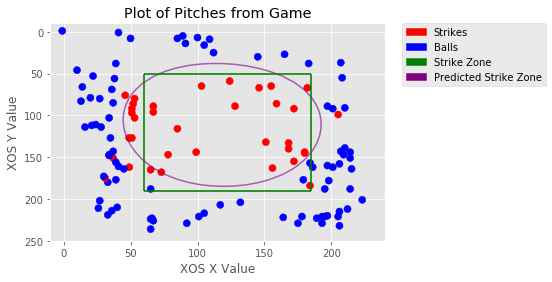

In [171]:
plt.scatter(vec[:, 0], vec[:, 1], c=frame.Result, s=50, cmap='bwr')
plt.xlabel('XOS X Value')
plt.ylabel('XOS Y Value')
plt.title('Plot of Pitches from Game')
red_patch = mpatches.Patch(color='red', label='Strikes')
blue_patch = mpatches.Patch(color='blue', label='Balls')
green_patch = mpatches.Patch(color='green', label='Strike Zone')
purple_patch = mpatches.Patch(color='purple', label='Predicted Strike Zone')
plt.legend(handles=[red_patch, blue_patch, green_patch, purple_patch], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plot_svc_decision_function(clf)

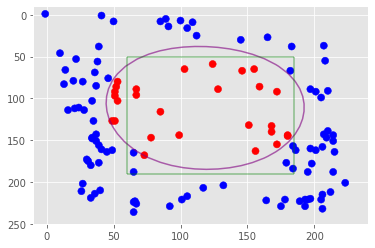

In [253]:
preds = clf.predict(vec)
plt.scatter(vec[:, 0], vec[:, 1], c=preds, s=50, cmap='bwr')
plot_svc_decision_function(clf)

In [71]:
locs = pd.read_csv('../../PyTorch-YOLOv3/detect/output.csv', sep = " ", header = None)

In [72]:
locs.columns = ['x', 'y', 'x1', 'y1', 'x4', 'y4']
len(locs)
locs.x = locs.x + 60
locs.y = locs.y + 50

In [77]:
yuh = locs[43:44]

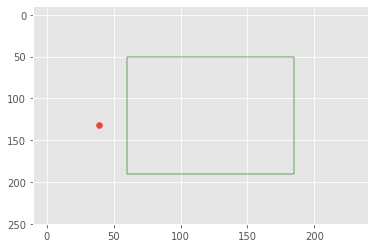

In [78]:
plt.scatter(yuh.x, yuh.y)
plt.xlim(-10, 240)
plt.ylim(250, -10)

plt.hlines(y=50, xmin=60, xmax=185, linewidth=2, color='g', alpha = 0.3)
plt.hlines(y=190, xmin=60, xmax=185, linewidth=2, color='g', alpha = 0.3)
plt.vlines(x=60, ymin=50, ymax=190, linewidth=2, color='g', alpha = 0.3)
plt.vlines(x=185, ymin=50, ymax=190, linewidth=2, color='g', alpha = 0.3)
#plt.hlines(y=59, xmin=80, xmax=166, linewidth=2, color='g', alpha = 0.3)
#plt.hlines(y=178, xmin=80, xmax=166, linewidth=2, color='g', alpha = 0.3)
#plt.vlines(x=80, ymin=59, ymax=178, linewidth=2, color='g', alpha = 0.3)
#plt.vlines(x=166, ymin=59, ymax=178, linewidth=2, color='g', alpha = 0.3)